# Exercise Chapter 6 
Modern Statistics: A Computer Based Approach with Python<br>
by Ron Kenett, Shelemyahu Zacks, Peter Gedeck

Publisher: Springer International Publishing; 1st edition (September 15, 2022) <br>
ISBN-13: 978-3031075650

(c) 2022 Ron Kenett, Shelemyahu Zacks, Peter Gedeck

The code needs to be executed in sequence.

Python packages and Python itself change over time. This can cause warnings or errors. We
"Warnings" are for information only and can usually be ignored. 
"Errors" will stop execution and need to be fixed in order to get results. 

If you come across an issue with the code, please follow these steps

- Check the repository (https://gedeck.github.io/mistat-code-solutions/) to see if the code has been upgraded. This might solve the problem.
- Check the errata at (https://gedeck.github.io/mistat-code-solutions/ModernStatistics/) and the issue tracker at https://github.com/gedeck/mistat-code-solutions/issues to see if the issue is known and a solution available.
- Report the problem using the issue tracker at https://github.com/gedeck/mistat-code-solutions/issues
- Paste the error message into Google and see if someone else already found a solution

In [1]:
import os
os.environ['OUTDATED_IGNORE'] = '1'
import warnings
from outdated import OutdatedPackageWarning
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=OutdatedPackageWarning)

In [2]:
import math
import mistat
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa import tsatools
import statsmodels.formula.api as smf

# Exercise 2

In [3]:
seascom = mistat.load_data('SEASCOM.csv')
df = tsatools.add_trend(seascom, trend='ct')
df['season_1'] = [np.cos(math.pi * tx/6) for tx in df['trend']]
df['season_2'] = [np.sin(math.pi * tx/6) for tx in df['trend']]
print(df.head())

model = smf.ols(formula='SeasCom ~ trend + 1 + season_1 + season_2',
                data=df).fit()
print(model.params)
print(f'r2-adj: {model.rsquared_adj:.3f}')

    SeasCom  const  trend      season_1  season_2
0  71.95623    1.0    1.0  8.660254e-01  0.500000
1  56.36048    1.0    2.0  5.000000e-01  0.866025
2  64.85331    1.0    3.0  6.123234e-17  1.000000
3  59.93460    1.0    4.0 -5.000000e-01  0.866025
4  51.62297    1.0    5.0 -8.660254e-01  0.500000
Intercept    47.673469
trend         1.047236
season_1     10.653968
season_2     10.130145
dtype: float64
r2-adj: 0.981


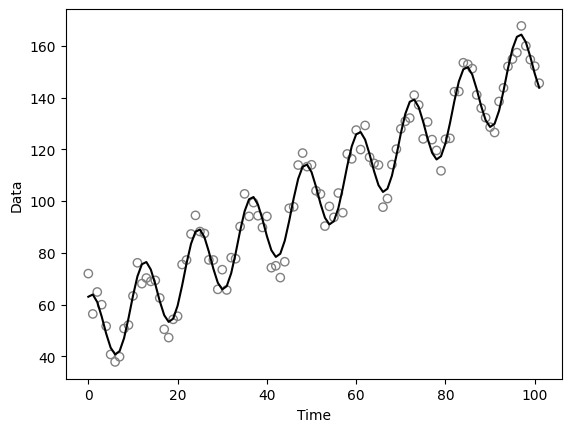

In [4]:
seascom = mistat.load_data('SEASCOM.csv')
fig, ax = plt.subplots()
ax.scatter(seascom.index, seascom, facecolors='none', edgecolors='grey')
model.predict(df).plot(ax=ax, color='black')
ax.set_xlabel('Time')
ax.set_ylabel('Data')
plt.show()

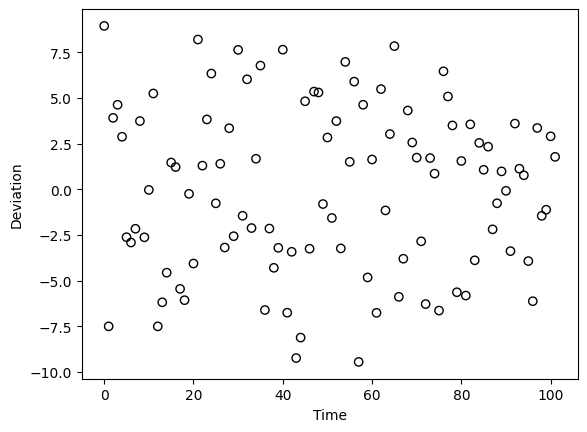

In [5]:
U = df['SeasCom'] - model.predict(df)
fig, ax = plt.subplots()
ax.scatter(U.index, U, facecolors='none', edgecolors='black')
ax.set_xlabel('Time')
ax.set_ylabel('Deviation')
plt.show()

In [6]:
# use slices to get sublists
corr_1 = np.corrcoef(U[:-1], U[1:])[0][1]
corr_2 = np.corrcoef(U[:-2], U[2:])[0][1]
print(f'Corr(Ut,Ut-1) = {corr_1:.3f}')
print(f'Corr(Ut,Ut-2) = {corr_2:.3f}')

Corr(Ut,Ut-1) = -0.191
Corr(Ut,Ut-2) = 0.132


In [7]:
# keep some information for later exercises
seascom_model = model
seascom_df = df

# Exercise 4

In [8]:
beta = np.array([1, 1.05, 0.76, -0.35, 0.45, 0.55])
data = []
n = len(beta)
sum_0 = np.sum(beta * beta)
for h in range(6):
  sum_h = np.sum(beta[:n-h] * beta[h:])
  data.append({
    'h': h,
    'K(h)': sum_h,
    'rho(h)': sum_h / sum_0,
  })

In [9]:
df = pd.DataFrame(data)
s = df[['K(h)', 'rho(h)']].transpose().style
s = s.format(precision=3)
s

# Exercise 11

In [10]:
dow1941 = mistat.load_data('DOW1941.csv')

X = dow1941.values # extract values to remove index for calculations
Y = X[2:] - 2 * X[1:-1] + X[:-2]

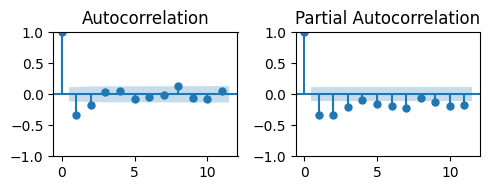

In [11]:
fig, axes = plt.subplots(ncols=2, figsize=[5, 2])
plot_acf(Y, lags=11, ax=axes[0])
plot_pacf(Y, lags=11, method='ywm', ax=axes[1])
plt.tight_layout()
plt.show()

In [12]:
# use argument alpha to return confidence intervals
y_acf, ci_acf = acf(Y, nlags=11, fft=True, alpha=0.05)
y_pacf, ci_pacf = pacf(Y, nlags=11, alpha=0.05)

# determine if values are significantly different from zero
def is_significant(y, ci):
    return not (ci[0] < 0 < ci[1])

s_acf = [is_significant(y, ci) for y, ci in zip(y_acf, ci_acf)]
s_pacf = [is_significant(y, ci) for y, ci in zip(y_pacf, ci_pacf)]

In [13]:
sn = {True: 'S', False: 'NS'}
print(' h        acf    S/NS      pacf   S/NS')
for i in range(len(y_acf)):
    if i == 0:
         continue
    print(f'{i:2d}   {y_acf[i]:8.3f}    {sn[s_acf[i]]:2s}', end='')
    print(f'    {y_pacf[i]:8.3f}   {sn[s_pacf[i]]:2s}')

 h        acf    S/NS      pacf   S/NS
 1     -0.342    S       -0.343   S 
 2     -0.179    S       -0.337   S 
 3      0.033    NS      -0.210   S 
 4      0.057    NS      -0.100   NS
 5     -0.080    NS      -0.155   S 
 6     -0.047    NS      -0.193   S 
 7     -0.010    NS      -0.237   S 
 8      0.128    NS      -0.074   NS
 9     -0.065    NS      -0.127   S 
10     -0.071    NS      -0.204   S 
11      0.053    NS      -0.193   S 


# Exercise 12

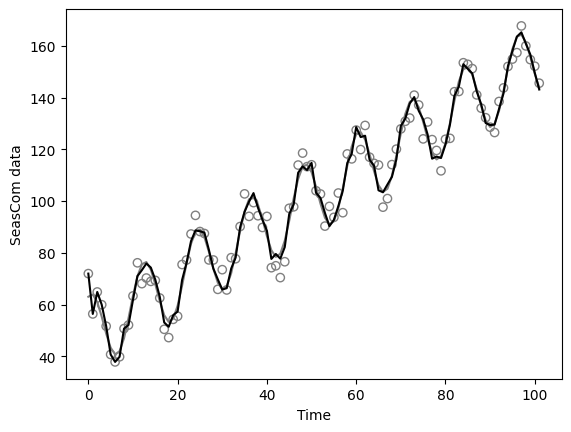

In [14]:
predictedError = mistat.optimalLinearPredictor(seascom_model.resid,
                      10, nlags=9)
predictedTrend = seascom_model.predict(seascom_df)
correctedTrend = predictedTrend + predictedError

fig, ax = plt.subplots()
ax.scatter(seascom_df.index, seascom_df['SeasCom'],
           facecolors='none', edgecolors='grey')
predictedTrend.plot(ax=ax, color='grey')
correctedTrend.plot(ax=ax, color='black')
ax.set_xlabel('Time')
ax.set_ylabel('SeasCom data')
plt.show()